#Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge

# Выбор датасетов
Номер в группе - 2 - четное

Следовательно, датасет про жильё в Калифорнии


In [ ]:
df = pd.read_csv("/content/california_housing_train.csv")

#Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

Проверим загрузку датасета

In [ ]:
df.sample(n=5, random_state=1337)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14754,-122.20,39.15,33.0,1064.0,174.0,434.0,147.0,3.1250,108000.0
173,-116.26,33.07,17.0,934.0,284.0,452.0,184.0,1.9875,83700.0
9414,-119.23,35.79,31.0,2862.0,606.0,2467.0,600.0,2.3125,62100.0
9430,-119.24,35.68,21.0,1885.0,398.0,1539.0,388.0,2.5208,58500.0
8256,-118.45,35.58,16.0,5396.0,1182.0,1802.0,807.0,1.8819,69700.0


In [ ]:
print(df.columns)
print()
df.info()
df.describe()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Не обязательно
#for quantile in [.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
#  print(f"quantile = ", quantile)
#  print(df.quantile(quantile), "\n")

В датасете есть координаты, отобразим их

<Axes: >

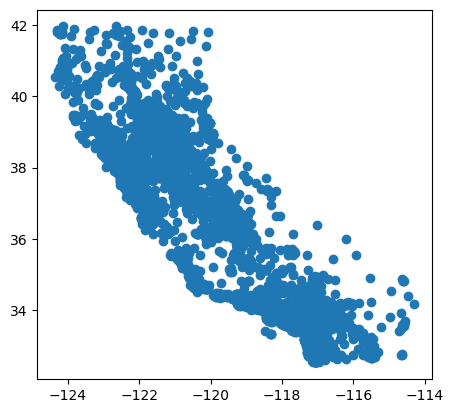

In [ ]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf.plot()

Превосходная Калифорния

#Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.

In [ ]:
df.isna().values.any()

False

Как видим NaN'ов нет



На категории разбивать данные нет необходимости

Нормализация данных

In [ ]:
df_min_max_scaled = df.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
df_min_max_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125
...,...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081,0.198764
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170,0.131960
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577,0.182682
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054,0.145981


Рассмотрим корреляции

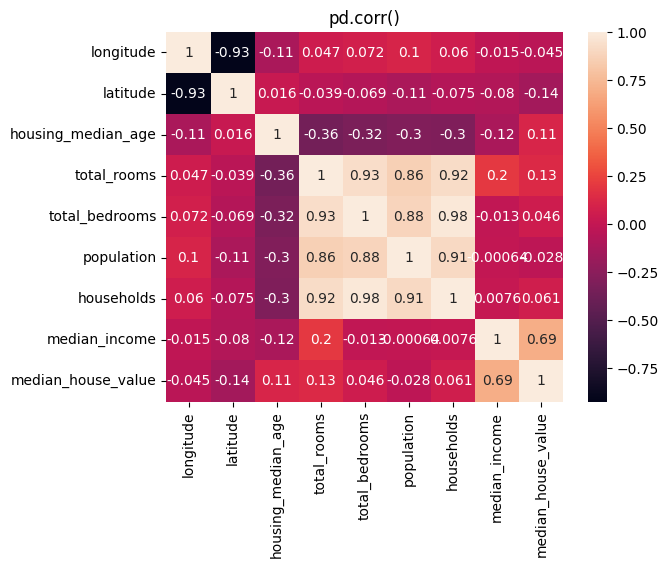

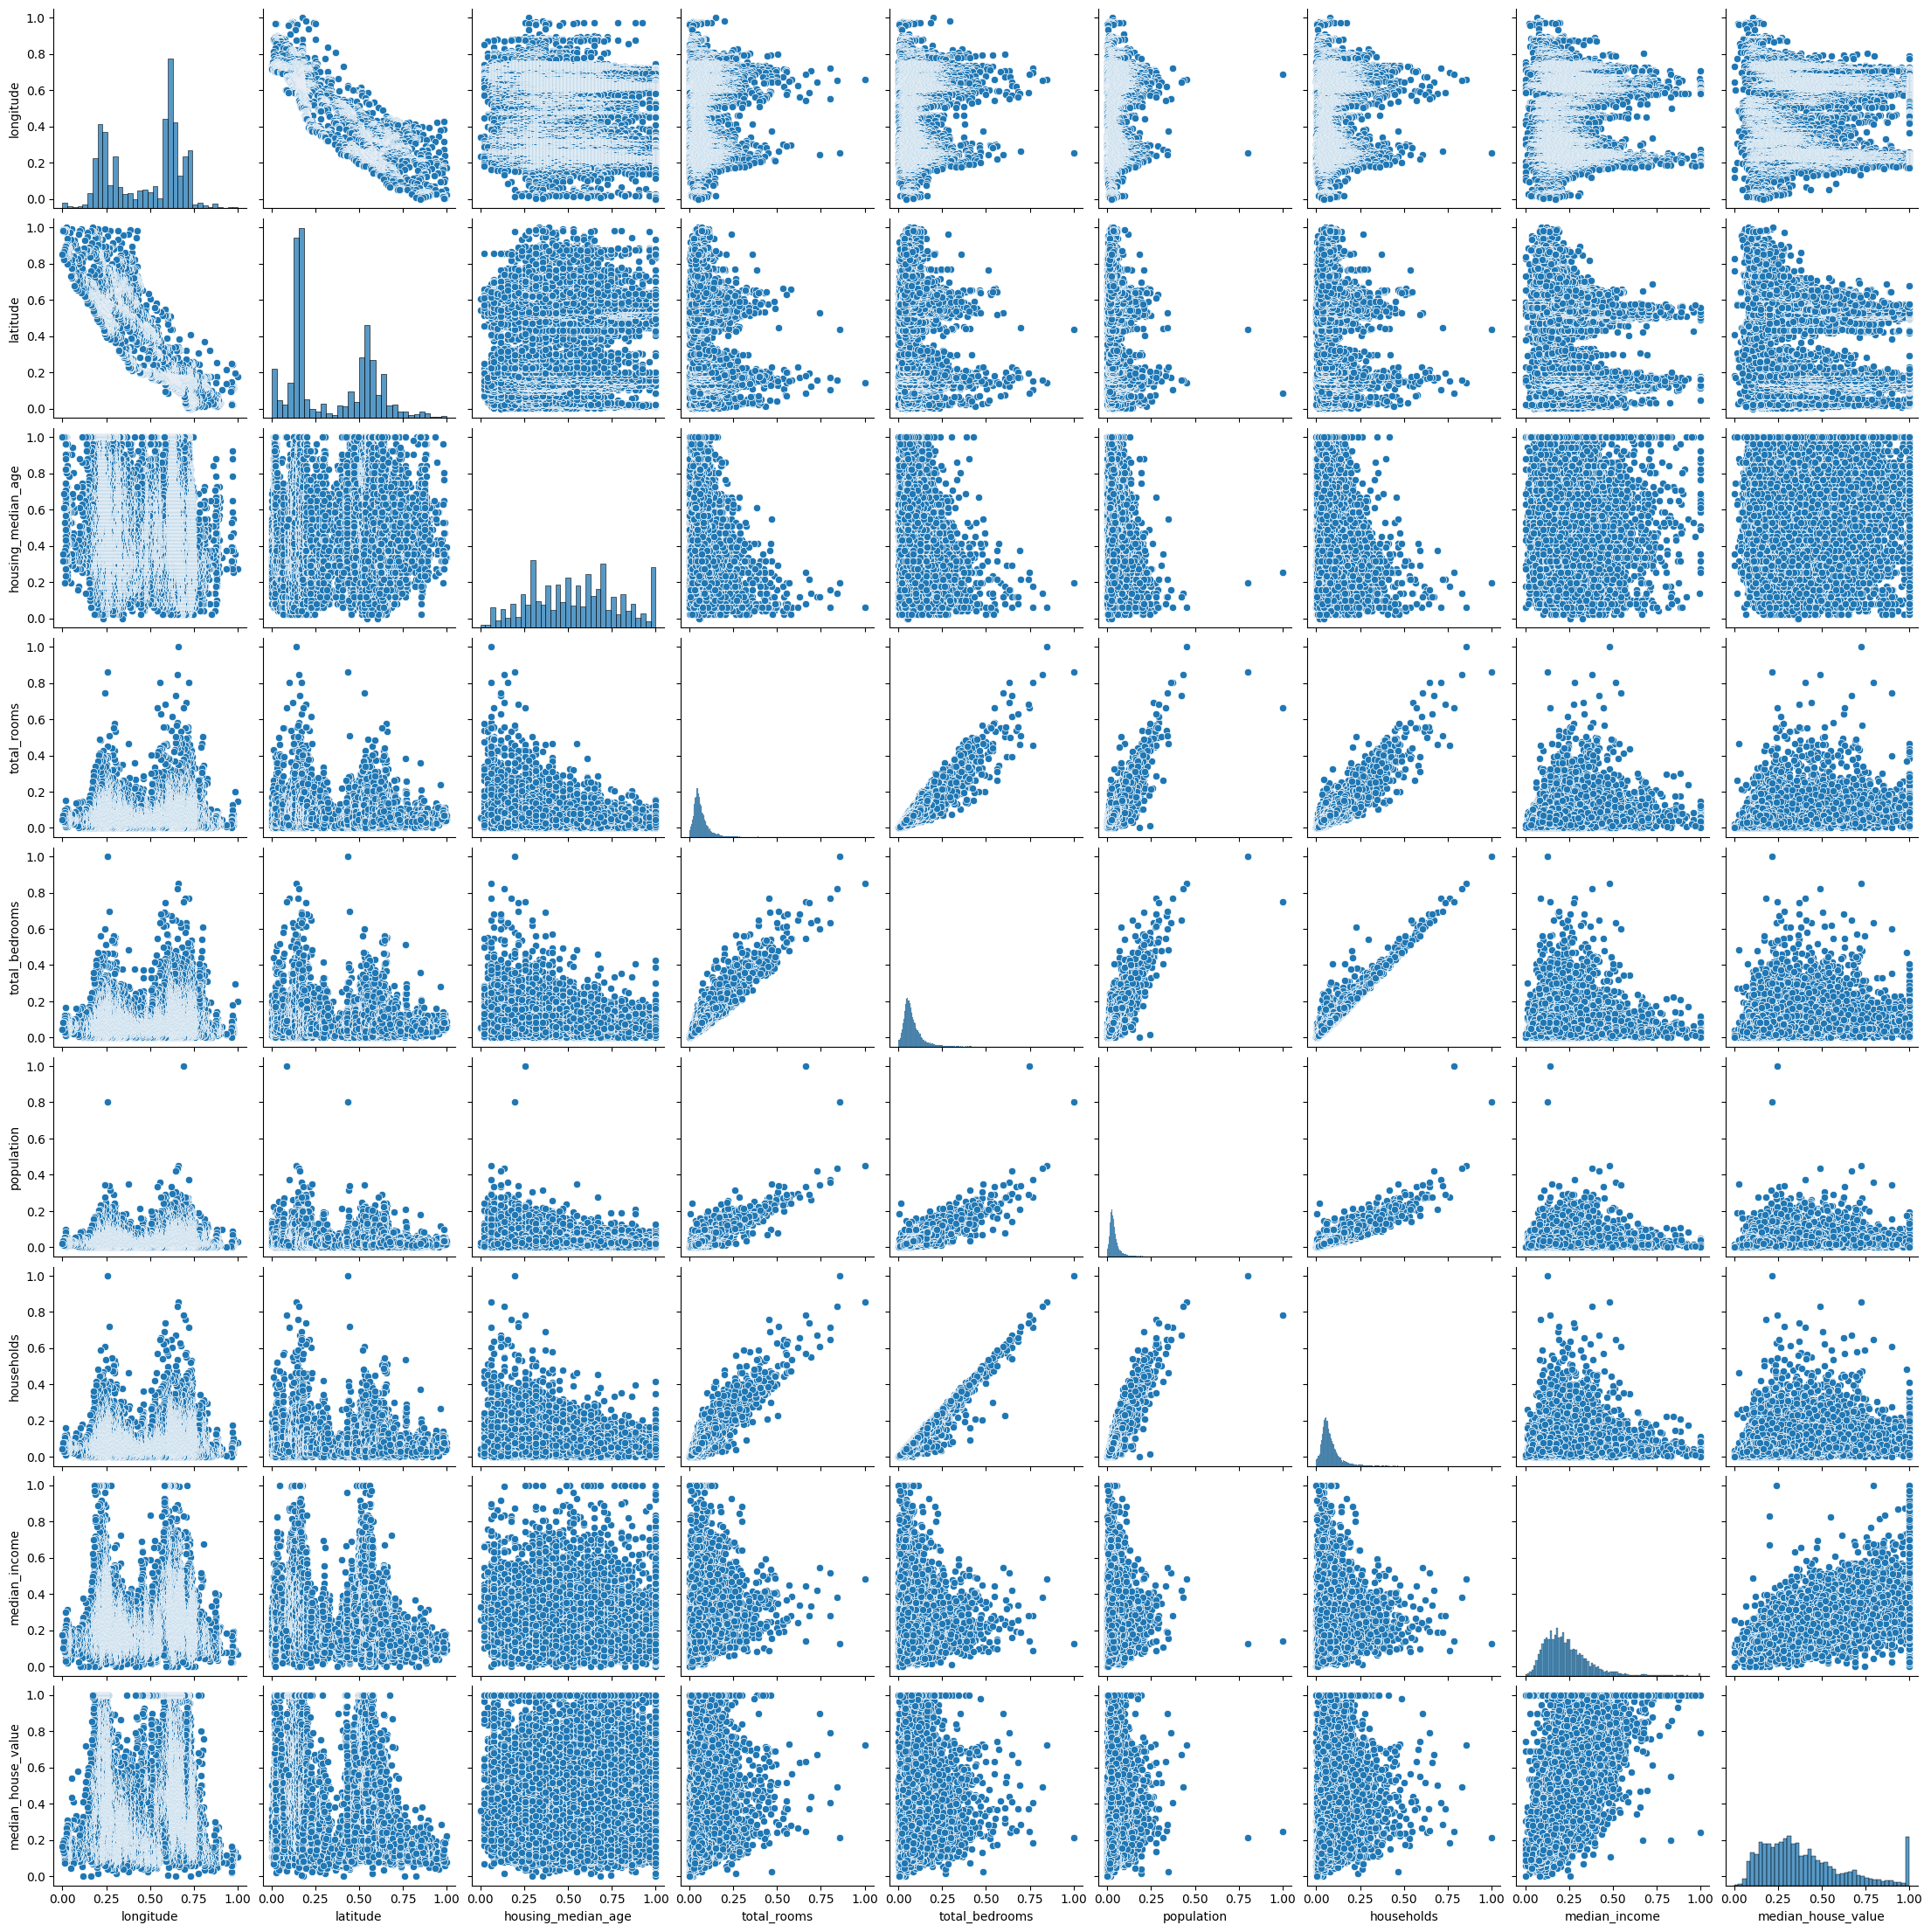

In [ ]:
sns.heatmap(df.corr(), annot=True); plt.title("pd.corr()"); plt.show()

sns.pairplot(df_min_max_scaled); plt.show()

По графикам заметим такие виды зависимостей:

population <- households, total_rooms, total_bedrooms

median_house_value <- median_income, total_rooms, housing_median_age

Попробуем найти зависимости стоимости дома от расположения

median_house_value <- longitude, latitude


#Разделите данные на обучающий и тестовый наборы данных.

In [ ]:
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(df_min_max_scaled, df_min_max_scaled, test_size=0.2, random_state=42)

#Реализуйте линейную регрессию


In [ ]:
def fit(x, y):
    x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
    return np.linalg.solve(np.dot(x.T, x), np.dot(x.T, y))

def predict(x, w):
    x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
    return np.dot(x, w)

def r2_score(y_predicted, y):
    d1 = y - y_predicted
    d2 = y - y.mean()
    return 1 - d1.dot(d1) / d2.dot(d2)


#Постройте три модели с различными наборами признаков.

##Первая (моя) модель

population <- households, total_rooms, total_bedrooms

In [ ]:
x_train = x_train_all[["households", "total_rooms", "total_bedrooms"]]
x_test = x_test_all[["households", "total_rooms", "total_bedrooms"]]
y_train = y_train_all["population"]
y_test = y_test_all["population"]
w = fit(x_train, y_train)
y_predicted = predict(x_test, w)

r2_score(y_predicted, y_test)

0.8714026075278871

median_house_value <- median_income, total_rooms, housing_median_age

In [ ]:
x_train = x_train_all[["median_income", "total_rooms", "housing_median_age"]]
x_test = x_test_all[["median_income", "total_rooms", "housing_median_age"]]
y_train = y_train_all["median_house_value"]
y_test = y_test_all["median_house_value"]
w = fit(x_train, y_train)
y_predicted = predict(x_test, w)

r2_score(y_predicted, y_test)

0.5422510309140074

median_house_value <- longitude, latitude

In [ ]:
x_train = x_train_all[["longitude", "latitude"]]
x_test = x_test_all[["longitude", "latitude"]]
y_train = y_train_all["median_house_value"]
y_test = y_test_all["median_house_value"]
w = fit(x_train, y_train)
y_predicted = predict(x_test, w)

r2_score(y_predicted, y_test)

0.24233493503265846

Как видим, используя количество комнат, спальн и  домов хорошо получается предсказать население

Стоимость дома же от зарплат, кол-ва комнат и возраста дома тяжелее получается предсказать

А вот стоимость дома от координат совсем не очень выходит предсказать

##Вторая модель - sklearn линейная регрессия

population <- households, total_rooms, total_bedrooms

In [ ]:
x_train = x_train_all[["households", "total_rooms", "total_bedrooms"]]
x_test = x_test_all[["households", "total_rooms", "total_bedrooms"]]
y_train = y_train_all["population"]
y_test = y_test_all["population"]

model = LinearRegression()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r2_score(y_predicted, y_test)

0.8714026075278871

median_house_value <- median_income, total_rooms, housing_median_age

In [ ]:
x_train = x_train_all[["median_income", "total_rooms", "housing_median_age"]]
x_test = x_test_all[["median_income", "total_rooms", "housing_median_age"]]
y_train = y_train_all["median_house_value"]
y_test = y_test_all["median_house_value"]

model = LinearRegression()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r2_score(y_predicted, y_test)

0.5422510309140074

median_house_value <- longitude, latitude

In [ ]:
x_train = x_train_all[["longitude", "latitude"]]
x_test = x_test_all[["longitude", "latitude"]]
y_train = y_train_all["median_house_value"]
y_test = y_test_all["median_house_value"]

model = LinearRegression()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r2_score(y_predicted, y_test)

0.24233493503265846

Как видим, моя линейная регрессия получилась такой же, как и встроенная в sklearn, так что сравнивать нет необходимости

##Третья модель - sklearn ExtraTreesRegressor

population <- households, total_rooms, total_bedrooms

In [ ]:
x_train = x_train_all[["households", "total_rooms", "total_bedrooms"]]
x_test = x_test_all[["households", "total_rooms", "total_bedrooms"]]
y_train = y_train_all["population"]
y_test = y_test_all["population"]

model = ExtraTreesRegressor()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r2_score(y_predicted, y_test)

0.8317484298857041

median_house_value <- median_income, total_rooms, housing_median_age

In [ ]:
x_train = x_train_all[["median_income", "total_rooms", "housing_median_age"]]
x_test = x_test_all[["median_income", "total_rooms", "housing_median_age"]]
y_train = y_train_all["median_house_value"]
y_test = y_test_all["median_house_value"]

model = ExtraTreesRegressor()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r2_score(y_predicted, y_test)

0.5008619799162747

median_house_value <- longitude, latitude

In [ ]:
x_train = x_train_all[["longitude", "latitude"]]
x_test = x_test_all[["longitude", "latitude"]]
y_train = y_train_all["median_house_value"]
y_test = y_test_all["median_house_value"]

model = ExtraTreesRegressor()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r2_score(y_predicted, y_test)

0.7842625711257457

Как видим, эта модель разновидности дерева решений лучше работает, чем линейная регрессия, показывает хорошие результаты особенно на координатах

##Четвертая модель - sklearn Ridge

population <- households, total_rooms, total_bedrooms

In [ ]:
x_train = x_train_all[["households", "total_rooms", "total_bedrooms"]]
x_test = x_test_all[["households", "total_rooms", "total_bedrooms"]]
y_train = y_train_all["population"]
y_test = y_test_all["population"]

model = Ridge(alpha=0.1)
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r2_score(y_predicted, y_test)

0.8715430629356626

median_house_value <- median_income, total_rooms, housing_median_age

In [ ]:
x_train = x_train_all[["median_income", "total_rooms", "housing_median_age"]]
x_test = x_test_all[["median_income", "total_rooms", "housing_median_age"]]
y_train = y_train_all["median_house_value"]
y_test = y_test_all["median_house_value"]

model = Ridge(alpha=0.1)
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r2_score(y_predicted, y_test)

0.5422285591088966

median_house_value <- longitude, latitude

In [ ]:
x_train = x_train_all[["longitude", "latitude"]]
x_test = x_test_all[["longitude", "latitude"]]
y_train = y_train_all["median_house_value"]
y_test = y_test_all["median_house_value"]

model = Ridge(alpha=0.1)
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r2_score(y_predicted, y_test)

0.242334727082142

Как видим, эта модель использующая регулизацию, даёт похожие результаты как и линейная регрессия, предсказывание населения лучше всего происходит

#Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.

По моделям можно сделать вывод, что дерево решений превосходно справляется со всеми задачами, но менее производительна, зато теперь можно предсказывать стоимость дома исходя от координат в штате

#Бонусное задание

Ввести синтетический признак при построении модели

In [ ]:
x_train = x_train_all.drop(["housing_median_age", "longitude", "latitude", "median_house_value", "median_income"], axis=1)
print(x_train)
x_train["kek"] = x_train_all["total_bedrooms"] / (x_train_all["median_income"] + 1)
x_test = x_test_all.drop(["housing_median_age", "longitude", "latitude", "median_house_value", "median_income"], axis=1)
x_test["kek"] = x_test_all["total_bedrooms"] / (x_test_all["median_income"] + 1)
y_train = y_train_all["housing_median_age"]
y_test = y_test_all["housing_median_age"]

       total_rooms  total_bedrooms  population  households
4679      0.071412        0.054469    0.036492    0.060352
2512      0.095347        0.083023    0.042126    0.080743
993       0.011652        0.012725    0.009922    0.014142
1327      0.059918        0.058038    0.028532    0.062161
4630      0.063609        0.060987    0.033970    0.067752
...            ...             ...         ...         ...
11284     0.062581        0.073557    0.032848    0.072357
11964     0.020351        0.022191    0.009894    0.024503
5390      0.023698        0.031657    0.021217    0.034040
860       0.096112        0.138734    0.092211    0.137971
15795     0.064584        0.096524    0.054065    0.090117

[13600 rows x 4 columns]


Моя модель

In [ ]:
w = fit(x_train, y_train)
y_predicted = predict(x_test, w)

r2_score(y_predicted, y_test)

0.13515349991375214

ExtraTress

In [ ]:
model = ExtraTreesRegressor()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r2_score(y_predicted, y_test)

0.18699104642004316

Ridge

In [ ]:
model = Ridge(alpha=0.1)
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

r2_score(y_predicted, y_test)

0.1347594342933779

#Вывод

Построили модели линейной регрессии. Исследовали датасет на возможность предсказания данных и получили ожидаемые результаты: линейная регрессия применима там, где уже видна линейная зависимость. Никакие махинации с комбинированием признаков (созданием синтетических) не дают положительного результата. ExtraTrees мне нравится, т.к. она решила интересный мне кейс.